In [2]:
import numpy as np
import pandas as pd
import scipy
import scipy.io as sio

from pathlib import Path

import altair as alt
from altair.expr import datum

In [3]:
%load_ext watermark

In [4]:
%watermark --iversions

altair    2.4.1
pandas    0.24.2
numpy     1.16.3
scipy     1.2.1



# 0. Utility functions
- Define function that flattens the output from scipy.io.loadmat 
- Set paths to `data` folder
- Load dataframes with ID -> BiGG ID conversion table
- Define functions that help to load relevant experimental data from each simulation

In [5]:
from utils import (
    get_khodayari_kos,
    get_millard_kos,
    get_kurata_kos,
    get_chassagnole_kos,
    load_khodayari,
    load_kurata,
    load_millard,
    load_chassagnole,
    loadmat
)

In [6]:
# useful metrics to compare data
from utils import relative_error, normalized_error

In [7]:
data_path = Path('../data')
path_to_results = data_path / "simulation_results"
khodayari_path = path_to_results / "Khodayari"
millard_path = path_to_results / "Millard"
kurata_path = path_to_results / "Kurata"
chassagnole_path = path_to_results / "Chassagnole"

In [8]:
# Load ID dataframes
khod_idf = pd.read_csv(data_path / "khodayari_id.csv")
millard_idf = pd.read_csv(data_path / "millard_id.csv")
kurata_idf = pd.read_csv(data_path / "kurata_id.csv")
chassagnole_idf = pd.read_csv(data_path / "chassagnole_id.csv")

# 1. Load the simulation data

In [9]:
khodayari_results = load_khodayari(
    sample_names="all",
    load_path=khodayari_path,
    id_df=khod_idf,
    files=get_khodayari_kos(),
)

Loaded data file for sample fbaA which has flux matrix of (786, 2)
Loaded data file for sample fbaB which has flux matrix of (786, 2)
Loaded data file for sample fbp which has flux matrix of (786, 97)
Loaded data file for sample gnd which has flux matrix of (786, 7)
Loaded data file for sample pfkA which has flux matrix of (786, 6)
Loaded data file for sample pfkB which has flux matrix of (786, 6)
Loaded data file for sample pgi which has flux matrix of (786, 5)
Loaded data file for sample pgl which has flux matrix of (786, 2)
Loaded data file for sample ppsA which has flux matrix of (786, 2)
Loaded data file for sample pts which has flux matrix of (786, 7)
Loaded data file for sample pykA which has flux matrix of (786, 2)
Loaded data file for sample pykF which has flux matrix of (786, 2)
Loaded data file for sample rpe which has flux matrix of (786, 2)
Loaded data file for sample rpiA which has flux matrix of (786, 7)
Loaded data file for sample rpiB which has flux matrix of (786, 7)


In [10]:
kurata_results = load_kurata(
    sample_names="all", load_path=kurata_path, id_df=kurata_idf, files=get_kurata_kos()
)

Loaded data file for sample fbaA which has flux matrix of (2101, 155)
Loaded data file for sample fbaB which has flux matrix of (2101, 155)
Loaded data file for sample fbp which has flux matrix of (2101, 155)
Loaded data file for sample gnd which has flux matrix of (2101, 155)
Loaded data file for sample gpmA which has flux matrix of (2101, 155)
Loaded data file for sample pfkA which has flux matrix of (2101, 155)
Loaded data file for sample pfkB which has flux matrix of (2101, 155)
Loaded data file for sample pgi which has flux matrix of (2101, 155)
Loaded data file for sample ppc which has flux matrix of (2101, 155)
Loaded data file for sample pgl which has flux matrix of (2101, 155)
Loaded data file for sample ppsA which has flux matrix of (2101, 155)
Loaded data file for sample pts which has flux matrix of (2101, 155)
Loaded data file for sample pykA which has flux matrix of (2101, 155)
Loaded data file for sample pykF which has flux matrix of (2101, 155)
Loaded data file for sampl

In [11]:
millard_results = load_millard(
    sample_names="all", load_path=millard_path, id_df=millard_idf, files = get_millard_kos()
)

Loaded data file for sample fbaA which has flux matrix of (68,)
Loaded data file for sample fbaB which has flux matrix of (68,)
Loaded data file for sample fbp which has flux matrix of (68,)
Loaded data file for sample gnd which has flux matrix of (68,)
Loaded data file for sample pfkA which has flux matrix of (68,)
Loaded data file for sample pfkB which has flux matrix of (68,)
Loaded data file for sample pgi which has flux matrix of (68,)
Loaded data file for sample pgl which has flux matrix of (68,)
Loaded data file for sample ppsA which has flux matrix of (68,)
Loaded data file for sample pts which has flux matrix of (68,)
Loaded data file for sample pykA which has flux matrix of (68,)
Loaded data file for sample pykF which has flux matrix of (68,)
Loaded data file for sample rpe which has flux matrix of (68,)
Loaded data file for sample rpiA which has flux matrix of (68,)
Loaded data file for sample rpiB which has flux matrix of (68,)
Loaded data file for sample sdhCD which has fl

In [12]:
chassagnole_results = load_chassagnole(
    sample_names="all",
    load_path=chassagnole_path,
    id_df=chassagnole_idf,
    files=get_chassagnole_kos(),
)

Loaded data file for sample fbaA which has flux matrix of (48,)
Loaded data file for sample fbaB which has flux matrix of (48,)
Loaded data file for sample gnd which has flux matrix of (48,)
Loaded data file for sample pfkA which has flux matrix of (48,)
Loaded data file for sample pfkB which has flux matrix of (48,)
Loaded data file for sample pgi which has flux matrix of (48,)
Loaded data file for sample pykAF which has flux matrix of (48,)
Loaded data file for sample rpe which has flux matrix of (48,)
Loaded data file for sample rpiA which has flux matrix of (48,)
Loaded data file for sample rpiB which has flux matrix of (48,)
Loaded data file for sample talA which has flux matrix of (48,)
Loaded data file for sample talB which has flux matrix of (48,)
Loaded data file for sample tkt1 which has flux matrix of (48,)
Loaded data file for sample tkt2 which has flux matrix of (48,)
Loaded data file for sample tpi which has flux matrix of (48,)
Loaded data file for sample zwf which has f

In [13]:
simulation_results = pd.concat([khodayari_results, kurata_results, millard_results, chassagnole_results], sort=False)

In [14]:
simulation_results.head()

,flux,ID,BiGG_ID,author,sample_id,normalized_flux
0,-0.059225,ACALD,ACALD,Khodayari,fbaA,-0.059127
1,-0.004108,ACALDtpp_ex,composed of ACALDtex and ACALDtpp,Khodayari,fbaA,-0.004101
2,0.000028,ACKr,ACKr,Khodayari,fbaA,0.000028
3,94.519769,ACONTa,ACONTa,Khodayari,fbaA,94.364274
4,94.276304,ACONTb,ACONTb,Khodayari,fbaA,94.121209


# 2. Load experimental data and mix it with simulation data

In [15]:
ishii_df = pd.read_csv('../data/datasets/ishii2007_tidy.csv')

In [16]:
df = ishii_df
# this regexp matches deletions starting with d like dpgi
df["sample_id"] = df.Genotype.str.extract(r"d(\w+)")
df.loc[df.Genotype == "WT", "sample_id"] = "WT"

df = df.assign(author="Ishii")
df = df.rename(
    {
        "Measurement_ID": "BiGG_ID",
        "Original_Value": "normalized_flux",
        "Value": "flux",
        "Original_ID": "ID",
    },
    axis=1,
)
df = df[df['Measurement_Type'] == 'flux']
df.loc[df["BiGG_ID"] == "PYKF", "BiGG_ID"] = "PYK"

df = df[["flux", "ID", "BiGG_ID", "author", "sample_id", "normalized_flux"]]
exp_results = df

In [17]:
exp_results.head()

,flux,ID,BiGG_ID,author,sample_id,normalized_flux
25,0.0000,ACALD,ACALD,Ishii,pgm,0.0
26,2.8458,ACONTa,ACONTa,Ishii,pgm,93.0
27,2.2644,AKGDH,AKGDH,Ishii,pgm,74.0
28,2.8458,CS,CS,Ishii,pgm,93.0
29,0.2448,EX_akg(e),EX_akg(e),Ishii,pgm,8.0


# 3. Load COBRA data simulation and add it to data

In [18]:
cobra_results = pd.read_csv(f'../data/simulation_results/COBRA/iML1515/knockouts_all.csv', index_col=0)
cobra_results.head()

,ID,flux,sample_id,author,BiGG_ID,normalized_flux
0,ALATA_D2,0.000000,WT,iML1515,ALATA_D2,0.000000
1,SHCHD2,0.000042,WT,iML1515,SHCHD2,0.001481
2,CPPPGO,0.000042,WT,iML1515,CPPPGO,0.001481
3,GTHOr,0.000000,WT,iML1515,GTHOr,0.000000
4,DHORD5,0.000000,WT,iML1515,DHORD5,0.000000


In [19]:
core_results = pd.read_csv(path_to_results / "COBRA" / "core_model" / "knockouts_all.csv", index_col = 0)
core_results.head()

,ID,flux,sample_id,author,BiGG_ID,normalized_flux
0,ACALD,0.000000,WT,Ec_core,ACALD,0.000000
1,ACALDt,0.000000,WT,Ec_core,ACALDt,0.000000
2,ACKr,-1.284473,WT,Ec_core,ACKr,-44.911636
3,ACONTa,1.410814,WT,Ec_core,ACONTa,49.329156
4,ACONTb,1.410814,WT,Ec_core,ACONTb,49.329156


In [20]:
ecc_results = pd.read_csv(path_to_results / "COBRA" / "ECC2" / "knockouts_all.csv", index_col = 0)
ecc_results.head()

,ID,flux,sample_id,author,BiGG_ID,normalized_flux
0,EX_Biomass,1.900000e-01,WT,ECC2,EX_Biomass,6.643357e+00
1,EX_4CRSOL_ex,4.237000e-05,WT,ECC2,EX_4CRSOL_ex,1.481469e-03
2,EX_5DRIB_ex,1.274900e-04,WT,ECC2,EX_5DRIB_ex,4.457692e-03
3,EX_ac_ex,1.611354e+00,WT,ECC2,EX_ac_ex,5.634105e+01
4,EX_adp_c,1.762479e-15,WT,ECC2,EX_adp_c,6.162514e-14


In [21]:
exp_ecc_results = pd.read_csv(path_to_results / "COBRA" / "Exp_ECC2" / "knockouts_all.csv", index_col = 0)
exp_ecc_results.head()

,ID,flux,sample_id,author,BiGG_ID,normalized_flux
0,EX_Biomass,1.964540e-01,WT,Exp_ECC2,EX_Biomass,7.117900e+00
1,EX_4CRSOL_ex,4.380925e-05,WT,Exp_ECC2,EX_4CRSOL_ex,1.587292e-03
2,EX_5DRIB_ex,1.318207e-04,WT,Exp_ECC2,EX_5DRIB_ex,4.776111e-03
3,EX_ac_ex,1.445019e-02,WT,Exp_ECC2,EX_ac_ex,5.235576e-01
4,EX_adp_c,-1.385949e-15,WT,Exp_ECC2,EX_adp_c,-5.021556e-14


In [22]:
exp_iml_results = pd.read_csv(path_to_results / "COBRA" / "Exp_iML1515" / "knockouts_all.csv", index_col = 0)
exp_iml_results.head()

,ID,flux,sample_id,author,BiGG_ID,normalized_flux
0,ALATA_D2,0.000000,WT,Exp_iML1515,ALATA_D2,0.000000
1,SHCHD2,0.000042,WT,Exp_iML1515,SHCHD2,0.001486
2,CPPPGO,0.000042,WT,Exp_iML1515,CPPPGO,0.001486
3,GTHOr,0.000000,WT,Exp_iML1515,GTHOr,0.000000
4,DHORD5,0.000000,WT,Exp_iML1515,DHORD5,0.000000


In [23]:
all_results = pd.concat(
    [
        simulation_results,
        cobra_results,
        core_results,
        ecc_results,
        exp_ecc_results,
        exp_iml_results,
        exp_results,
    ],
    sort=False,
)

In [24]:
all_results.author.value_counts()

Exp_iML1515    65088
iML1515        62376
Khodayari      10511
Kurata          4293
ECC2            2684
Exp_ECC2        2684
Ec_core         1900
Millard         1564
Ishii           1012
Chassagnole      768
Name: author, dtype: int64

# 4. Subselect specific data and calculate error metrics

In [25]:
common_fluxes = set(khod_idf["BiGG ID"].unique()).intersection(
    set(millard_idf["BiGG ID"].unique()), set(kurata_idf["BiGG ID"].unique())
)

In [26]:
common_fluxes = {x for x in common_fluxes if pd.notna(x)}
#common_fluxes

In [27]:
common_fluxes = common_fluxes.intersection(set(exp_results.BiGG_ID.unique()))
common_fluxes

{'AKGDH',
 'CS',
 'EDA',
 'FBA',
 'FUM',
 'G6PDH2r',
 'GAPD',
 'GLCptspp',
 'GND',
 'ICDHyr',
 'ICL',
 'MALS',
 'MDH',
 'PDH',
 'PGI',
 'PGM',
 'PPC',
 'PTAr',
 'PYK',
 'RPE',
 'RPI',
 'SUCDi',
 'TALA',
 'TKT1',
 'TPI'}

In [28]:
selected_reactions = [x for x in common_fluxes if pd.notna(x)]

selected_strains = exp_results.sample_id.unique()
selected_authors = ["Khodayari", "Millard", "Kurata", "Ishii", "iML1515", "Chassagnole", "Ec_core", "ECC2", "Exp_ECC2", "Exp_iML1515"]
experimental_dataset = "Ishii"

# select the right data and find median flux if there are several fluxes which are mapped to one BiGG ID
selected_data = all_results[
    (all_results["BiGG_ID"].isin(selected_reactions))
    & (all_results["sample_id"].isin(selected_strains))
    & (all_results["author"].isin(selected_authors))
].groupby(["BiGG_ID", "sample_id", "author"]).median().reset_index()

In [29]:
selected_data.author.value_counts()

Ishii          550
Kurata         500
Exp_iML1515    475
Khodayari      450
iML1515        450
Exp_ECC2       425
ECC2           425
Millard        375
Ec_core        368
Chassagnole    165
Name: author, dtype: int64

In [30]:
reduced_reactions = common_fluxes.intersection(set(chassagnole_idf["BiGG ID"].unique()))
reduced_data = selected_data.query("BiGG_ID in @reduced_reactions")

### Calculate error metrics using `xarray`

In [175]:
xdf = selected_data.set_index(["sample_id", "author", "BiGG_ID"]).to_xarray()
nm_flux = xdf.normalized_flux
ishii_flux = xdf.sel(author='Ishii').normalized_flux

<xarray.DataArray 'normalized_flux' (sample_id: 22, author: 9, BiGG_ID: 25)>
array([[[ True, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       [[ True, False, ..., False, False],
        [ True, False, ..., False,  True],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]],

       ...,

       [[False, False, ...,  True, False],
        [False, False, ...,  True, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ...,  True, False]],

       [[False, False, ..., False, False],
        [False, False, ..., False, False],
        ...,
        [False, False, ..., False, False],
        [False, False, ..., False, False]]])
Coordinates:
  * sample_id  (sample_id) object 'WT' 'fbaB' 'fbp' ... 'tktA' 'tktB' 'zwf'
  * author     (author) object 'ECC2' 'Ec_core' ... 'Millard' 'iML1515'
 

In [208]:
# Mean absolute percent error (MAPE)
x_rel_error = abs(nm_flux - ishii_flux) / abs(nm_flux) * 100
x_rel_error = x_rel_error.rename('relative_error')
#x_rel_error = x_rel_error.where(x_rel_error < 1000, 1000)

In [177]:
# symmetric Mean Absolute Percent Error (sMAPE)
x_srel_error = 100*abs(nm_flux - ishii_flux) / (nm_flux+ishii_flux)
x_srel_error = x_srel_error.rename('symm_relative_error')

In [178]:
xdf['relative_error'] = x_rel_error
xdf['symm_relative_error'] = x_srel_error

In [179]:
import xarray as xr
def vector_norm(x, dim, ord=None):
    return xr.apply_ufunc(np.linalg.norm, x,
                          input_core_dims=[[dim]],
                          kwargs={'ord': ord, 'axis': -1})

In [268]:
# Norm metric used by Daniel
x_norm_error = vector_norm(nm_flux - ishii_flux, dim="BiGG_ID") / vector_norm(ishii_flux, dim="BiGG_ID")
x_norm_error = x_norm_error.rename('normalized_error')

## Calculate relative error

In [31]:
# Check if experimental data is present for every BiGG ID
# selected_data.groupby(["BiGG_ID", "sample_id"]).apply(lambda x: any(x.author.str.contains(experimental_dataset)))
selected_data = selected_data.query("author != 'Chassagnole' ")
selected_data = (
    selected_data.groupby(["BiGG_ID", "sample_id"])
    .apply(relative_error, exp_name=experimental_dataset)
    .reset_index()
    .drop("level_2", axis=1)
)

In [32]:
selected_data.head()

,BiGG_ID,sample_id,author,flux,normalized_flux,relative_error
0,AKGDH,WT,ECC2,0.000000,0.000000,1000.000000
1,AKGDH,WT,Ec_core,1.205823,42.161639,39.937635
2,AKGDH,WT,Exp_ECC2,1.619273,58.669298,0.563671
3,AKGDH,WT,Exp_iML1515,1.740514,61.035954,3.335663
4,AKGDH,WT,Ishii,1.687400,59.000000,0.000000


In [33]:
reduced_data = (
    reduced_data.groupby(["BiGG_ID", "sample_id"])
    .apply(relative_error, exp_name=experimental_dataset)
    .reset_index()
    .drop("level_2", axis=1)
)

In [34]:
reduced_data.head()

,BiGG_ID,sample_id,author,flux,normalized_flux,relative_error
0,FBA,WT,ECC2,1.338301,46.793758,84.853715
1,FBA,WT,Ec_core,2.329018,81.434183,6.220750
2,FBA,WT,Exp_ECC2,2.412603,87.413161,1.044650
3,FBA,WT,Exp_iML1515,2.373900,83.247415,3.907130
4,FBA,WT,Ishii,2.473900,86.500000,0.000000


## Calculate normalized error for datasets

In [35]:
normalized_errors = (
    selected_data.groupby(["sample_id"])
    .apply(normalized_error, exp_name="Ishii")
    .reset_index()
    .rename({0: "normalized_error"}, axis=1)
)

In [36]:
normalized_error(selected_data.groupby(["sample_id"]).get_group("pfkB"), exp_name="Ishii")

author
ECC2           0.689719
Ec_core        1.660444
Exp_ECC2       0.527606
Exp_iML1515    0.363488
Ishii          0.000000
Khodayari      0.895719
Kurata         0.508944
Millard        0.999690
iML1515        0.993600
dtype: float64

In [37]:
normalized_errors.head()

,sample_id,author,normalized_error
0,WT,ECC2,0.587672
1,WT,Ec_core,0.933461
2,WT,Exp_ECC2,0.060243
3,WT,Exp_iML1515,0.071121
4,WT,Ishii,0.000000


In [38]:
reduced_errors = reduced_data.groupby(["sample_id"]).apply(normalized_error, exp_name="Ishii").reset_index().rename({0 : "normalized_error"}, axis = 1)

In [39]:
reduced_errors.head()

,sample_id,author,normalized_error
0,WT,ECC2,0.367347
1,WT,Ec_core,1.045622
2,WT,Exp_ECC2,0.066036
3,WT,Exp_iML1515,0.076935
4,WT,Ishii,0.000000


In [39]:
selected_data.query("author == 'Ec_core' and sample_id == 'pfkA' ")

,BiGG_ID,sample_id,author,flux,normalized_flux,relative_error
36,AKGDH,pfkA,Ec_core,0.000000e+00,0.000000e+00,1000.000000
177,CS,pfkA,Ec_core,2.049910e-01,7.167517e+00,1000.000000
443,FBA,pfkA,Ec_core,0.000000e+00,0.000000e+00,1000.000000
584,FUM,pfkA,Ec_core,0.000000e+00,0.000000e+00,1000.000000
725,G6PDH2r,pfkA,Ec_core,8.013021e+00,2.801756e+02,95.003133
866,GAPD,pfkA,Ec_core,2.543916e+00,8.894811e+01,94.495416
1132,GND,pfkA,Ec_core,8.013021e+00,2.801756e+02,95.003133
1273,ICDHyr,pfkA,Ec_core,2.049910e-01,7.167517e+00,918.483738
1414,ICL,pfkA,Ec_core,0.000000e+00,0.000000e+00,1000.000000
1555,MALS,pfkA,Ec_core,0.000000e+00,0.000000e+00,1000.000000


# 5. Visualize

### Summary normalized error for the models

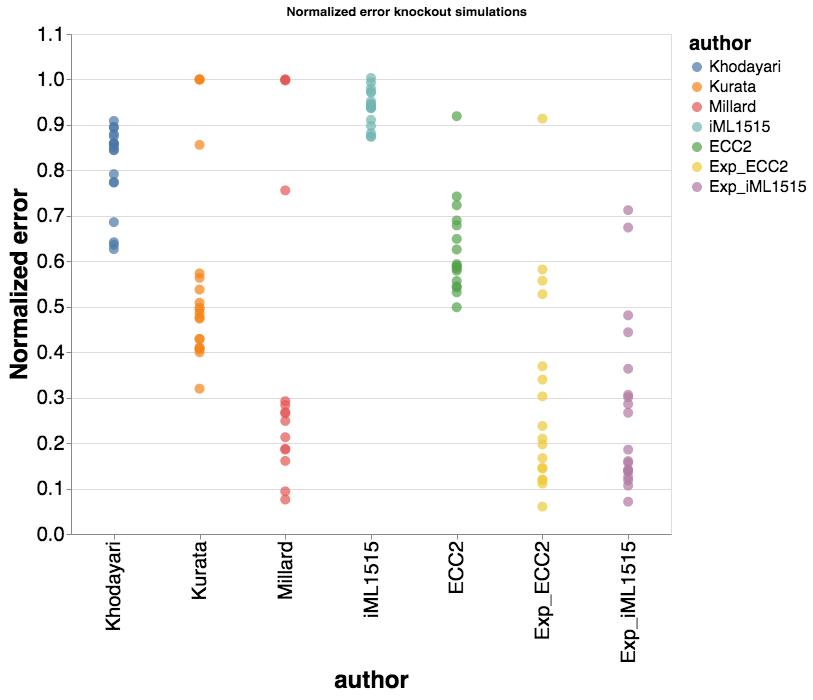

In [286]:
selector = alt.selection_single(empty="all", fields=["sample_id"])
color = alt.condition(
    selector,
    alt.Color(
        "author:N",
        sort=[
            "Khodayari",
            "Kurata",
            "Millard",
            "iML1515",
            "Ec_core",
            "ECC2",
            "Exp_ECC2",
        ],
    ),
    alt.value("lightgray"),
)
size = alt.condition(selector, alt.SizeValue(100), alt.SizeValue(40))


# put errors for each dataset as datapoints
errors = (
    alt.Chart(
        normalized_errors.query("author != 'Ishii' and author != 'Ec_core'"),
        title="Normalized error knockout simulations",
    )
    .mark_circle()
    .encode(
        y=alt.Y("normalized_error", title="Normalized error"),
        color=color,
        tooltip=["author", "sample_id", "normalized_error"],
        x=alt.X("author", sort=["Khodayari", "Kurata", "Millard", "iML1515"]),
        size=size,
    )
    .add_selection(selector)
)


(errors).properties(width=600, height=500).configure_axis(
    labelFontSize=20, titleFontSize=24
).configure_legend(labelFontSize=16, titleFontSize=20)

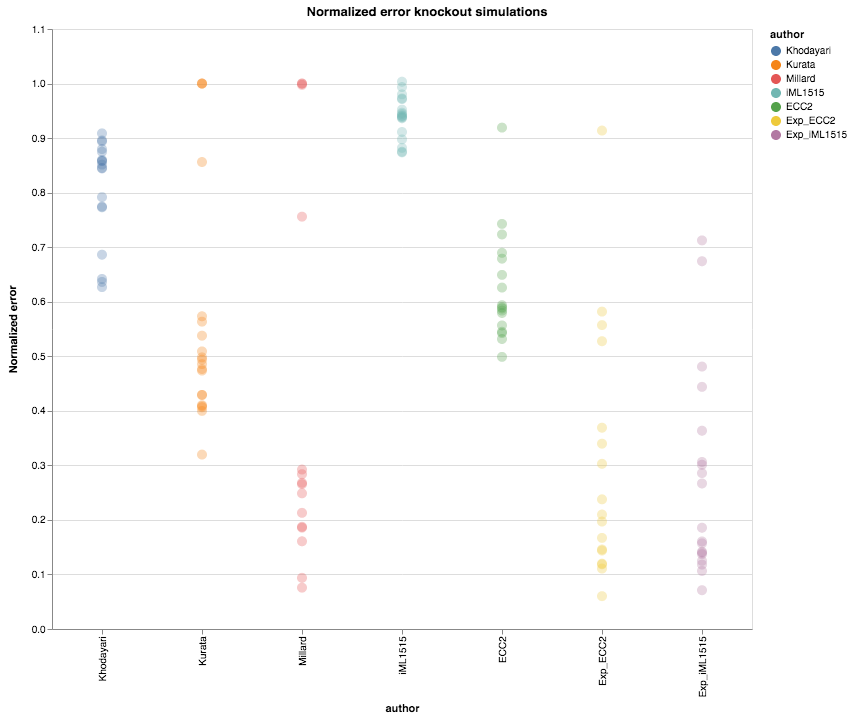

In [291]:
selector = alt.selection_single(empty="all", fields=["sample_id"])
color = alt.condition(
    selector,
    alt.Color(
        "author:N",
        sort=[
            "Khodayari",
            "Kurata",
            "Millard",
            "iML1515",
            "Ec_core",
            "ECC2",
            "Exp_ECC2",
        ],
    ),
    alt.value("lightgray"),
)

opacity = alt.condition(
    selector,
    alt.value("0.3"),
    alt.value("1.0"),
)

size = alt.condition(selector, alt.SizeValue(100), alt.SizeValue(40))


base = (
    alt.Chart(
        x_norm_error.to_dataframe().reset_index().query("author != 'Ishii' and author != 'Ec_core'"),
        title="Normalized error knockout simulations",
    )
    .mark_circle()
    .encode(
        y=alt.Y("normalized_error", title="Normalized error"),
        tooltip=["author", "sample_id", "normalized_error"],
        x=alt.X("author", sort=["Khodayari", "Kurata", "Millard", "iML1515"]),
        size=size,
        opacity = opacity
    )
)

errors = base.encode(color=color).add_selection(selector).transform_filter("datum.normalized_error !== null")

#na_vals = base.encode(color=alt.value("lightgrey")).transform_filter("datum.normalized_error === null")


(errors).properties(width=700, height=600).configure_axis(
    labelFontSize=24, titleFontSize=24
).configure_legend(labelFontSize=16, titleFontSize=20).configure(invalidValues=None)

In [293]:
def heatmap(xdf, author=None, sample_id=None):
    data = xdf.to_dataframe().reset_index()
    if sample_id:
        data = data.query(f"sample_id == '{sample_id}'")
        title = f"Heatmap for sample_id {sample_id}"
    else:
        data = data.query(f"author == '{author}'")
        title = f"Heatmap for author {author}"

    base = (
        alt.Chart(data, title=title)
        .mark_rect()
        .encode(
            y=alt.Y("BiGG_ID:N"),
            color=alt.condition(
                "datum.relative_error === null",
                alt.value("lightgrey"),
                alt.Color(
                    "relative_error",
                    scale=alt.Scale(
                        domain=[0, 50, 75, 100, 200, 300], scheme="greenblue"
                    ),
                ),
            ),
            tooltip=["sample_id", "BiGG_ID", "relative_error"],
        )
    )
    if sample_id:
        chart = base.encode(x=alt.X("author:N"))
    else:
        chart = base.encode(x=alt.X("sample_id:N"))

    return chart.configure(invalidValues=None)

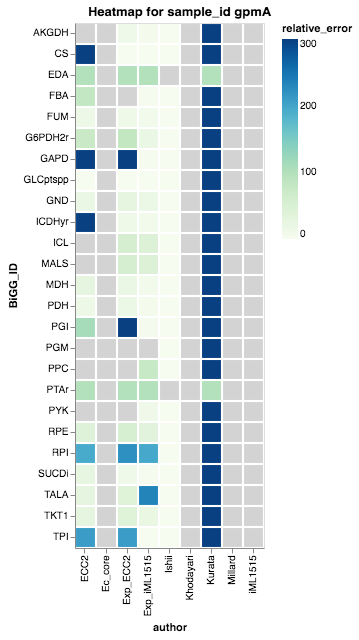

In [295]:
heatmap(x_rel_error, sample_id = "gpmA")

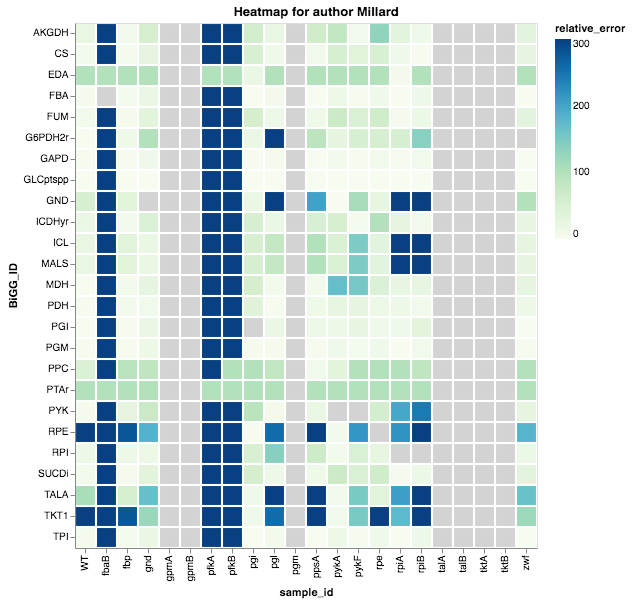

In [296]:
heatmap(x_rel_error, author="Millard")

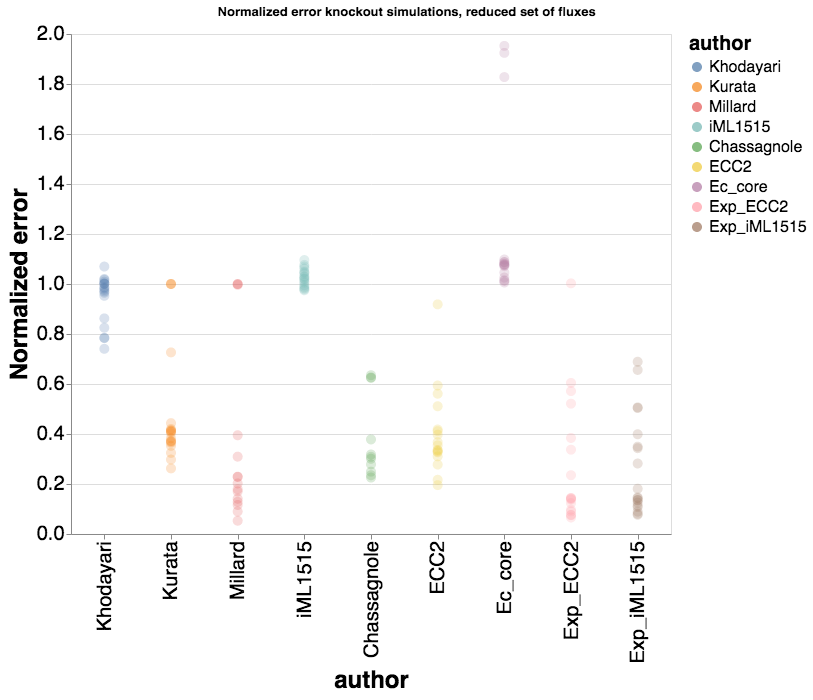

In [48]:
reduced_selector = alt.selection_single(empty="all", fields=["sample_id"])
reduced_color = alt.condition(
    reduced_selector,
    alt.Color(
        "author:N", sort=["Khodayari", "Kurata", "Millard", "iML1515", "Chassagnole"]
    ),
    alt.value("lightgray"),
)
reduced_size = alt.condition(reduced_selector, alt.SizeValue(100), alt.SizeValue(40))


base = alt.Chart(
    reduced_errors.query("author != 'Ishii'"),
    title="Normalized error knockout simulations, reduced set of fluxes",
)


# put errors for each dataset as datapoints
dots = (
    base.mark_circle(fillOpacity=0.3)
    .encode(
        y=alt.Y("normalized_error", title="Normalized error"),
        color=reduced_color,
        tooltip=["author", "sample_id", "normalized_error"],
        x=alt.X(
            "author", sort=["Khodayari", "Kurata", "Millard", "iML1515", "Chassagnole"]
        ),
        size=reduced_size,
    )
    .add_selection(reduced_selector)
)


dots.properties(width=600, height=500).configure_axis(
    labelFontSize=20, titleFontSize=24
).configure_legend(labelFontSize=16, titleFontSize=20)

# Export the data

In [42]:
path = data_path / "processed"
path.mkdir(parents=True, exist_ok=True)
selected_data.to_csv(path / "knockouts.csv")

In [43]:
normalized_errors.to_csv(data_path / "processed" / "normalized_errors.csv")

In [45]:
normalized_errors.author.value_counts()

Ishii          22
Kurata         20
Exp_iML1515    19
Khodayari      18
iML1515        18
Exp_ECC2       17
ECC2           17
Ec_core        16
Millard        15
Name: author, dtype: int64